# Build DSP

This notebook processes the training dataset to **dsp** tier. The outputs of the resulting file is what feed into the AP-SVM model. First, we load modules and files.

In [1]:
# Load modules 
import os, json, lgdo
import numpy as np
import matplotlib.pyplot as plt
import legendstyles
from dspeed import build_dsp
    
# Set plot style 
plt.style.use(legendstyles.LEGEND)

Load the training dataset raw file and the **dsp** configuration file with the necessary processors.

In [1]:
stack = "juleana"
data_type = "cal"
period = "p10"
run = "r000"

if stack == "juleana":
    raw_file = f'./l200-{period}-{run}-{data_type}-ml_train_raw.lh5'
    dsp_file = f'./l200-{period}-{run}-{data_type}-ml_train_dsp.lh5'
elif stack == "pygama":
    raw_file = f'./l200-{period}-{run}-cal-ml_train_raw.lh5'
    dsp_file = f'./l200-{period}-{run}-cal-ml_train_dsp.lh5'
    
with open("./dsp_config_dwt.json", "r") as f:
    dsp_config = json.load(f)

IndentationError: expected an indented block after 'if' statement on line 6 (1288010166.py, line 8)

Here we DSP the training dataset.

In [2]:
import logging 
logger = logging.getLogger(__name__)
logger.setLevel(level='DEBUG')

build_dsp(raw_file, 
          dsp_file, 
          dsp_config = dsp_config,
          write_mode = 'r')

Processing table ml_train/raw:  63%|######2   | 6400/10203 [00:02<00:01, 2900.76 rows/s]

Sanity check to make sure the **dsp** file was written properly.

In [3]:
lgdo.lh5.show(dsp_file)

/
└── ml_train · HDF5 group 
    └── dsp · table{daqenergy,dwt_norm,wf_norm,wf_presum} 
        ├── daqenergy · array<1>{real} 
        ├── dwt_norm · array_of_equalsized_arrays<1,1>{real} 
        ├── wf_norm · table{t0,dt,values} 
        │   ├── dt · array<1>{real} 
        │   ├── t0 · array<1>{real} 
        │   └── values · array_of_equalsized_arrays<1,1>{real} 
        └── wf_presum · table{t0,dt,values} 
            ├── dt · array<1>{real} 
            ├── t0 · array<1>{real} 
            └── values · array_of_equalsized_arrays<1,1>{real} 


Look at the normalized discrete wavelet transformed waveforms. Make sure that the amplitudes should be in between -1 and 1. 

findfont: Font family 'roboto' not found.
findfont: Font family ['roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family 'roboto' not found.


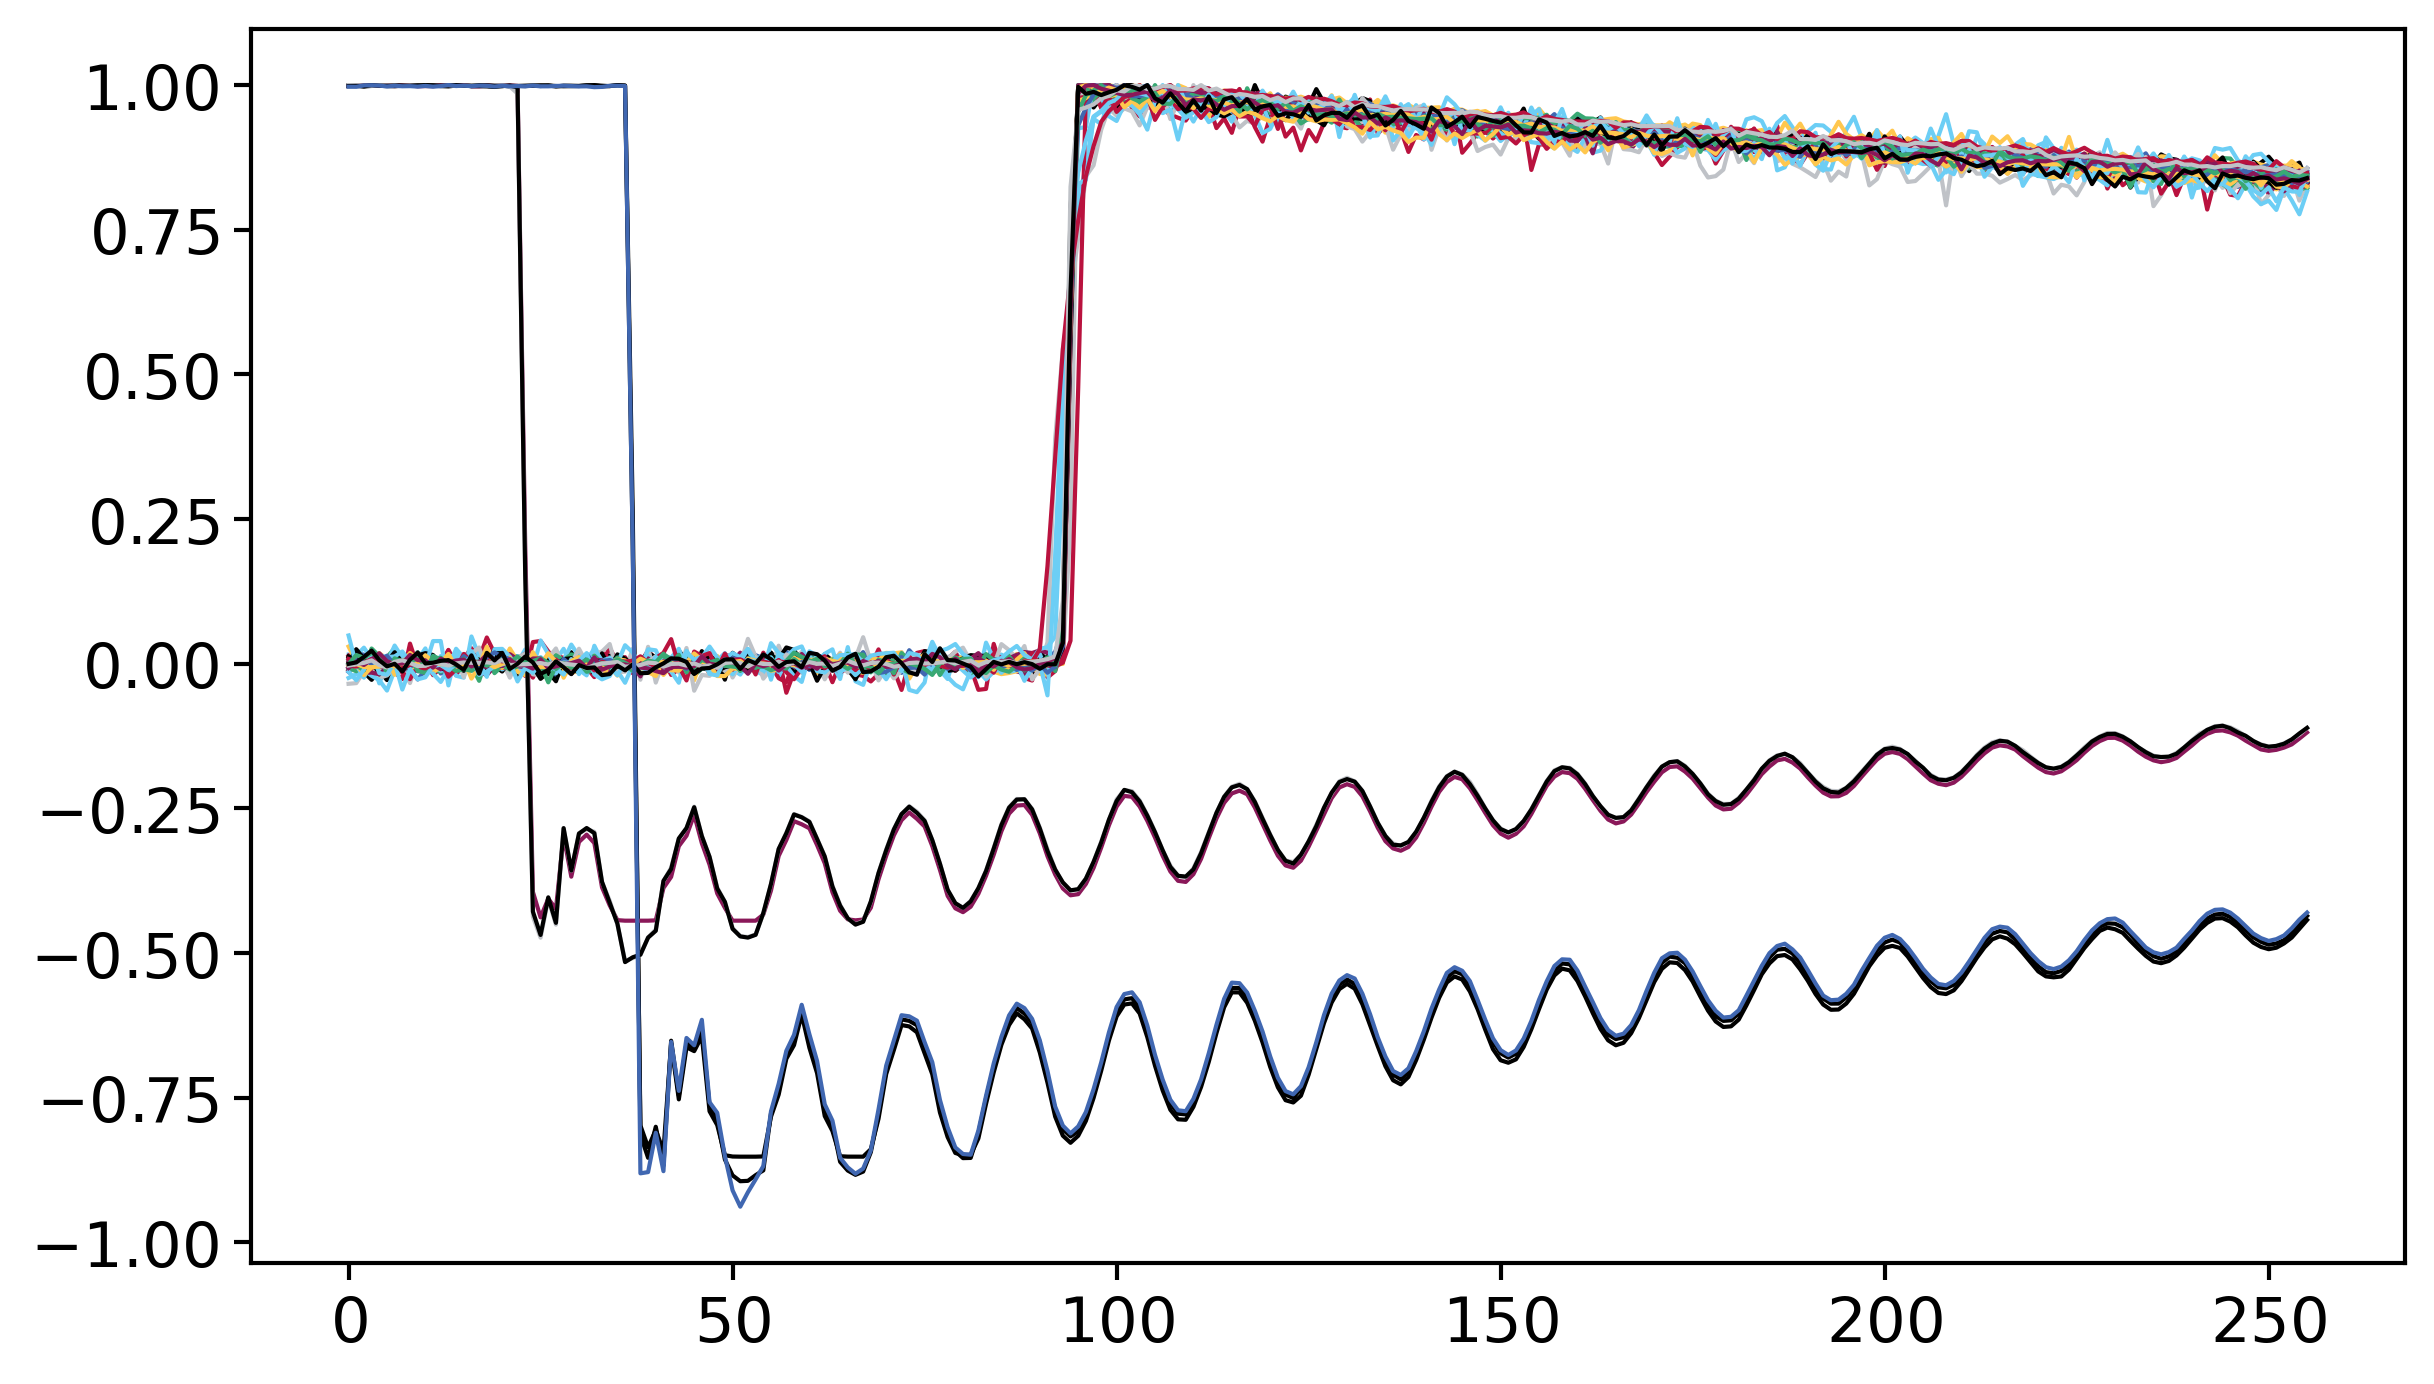

In [5]:
sto = lgdo.lh5.LH5Store()
tb, _ = sto.read('ml_train/dsp', dsp_file)
  
daqenergies = tb['daqenergy'].nda
dwts = tb['dwt_norm'].nda

fig, ax = plt.subplots(1,1)

cut = np.where(daqenergies > 0)[0]
samples = dwts[cut][0:50]

for i in samples:
    ax.plot(i)